# Import Libraries and set styles

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib.gridspec import GridSpec
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.graphics.gofplots import ProbPlot
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.regressionplots import influence_plot
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

# Ignore warning
import warnings
warnings.filterwarnings('ignore')

# Set Seaborn style
sns.set_style("darkgrid")

# Import Data - Bosto Housing Dataset

Independent variables:

0. **CRIM**: Per capita crime rate by town
1. **ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft
2. **INDUS**: Proportion of non-retail business acres per town
3. **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
4. **NOX**: Nitric oxide concentration (parts per 10 million)
5. **RM**: Average number of rooms per dwelling
6. **AGE**: Proportion of owner-occupied units built prior to 1940
7. **DIS**: Weighted distances to five Boston employment centers
8. **RAD**: Index of accessibility to radial highways
9. **TAX**: Full-value property tax rate per $10,000
10. **PTRATIO**: Pupil-teacher ratio by town
11. **B**: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
12. **LSTAT**: Percentage of lower status of the population

Dependent variable (based on sensory data):
13. **MEDV**: Median value of owner-occupied homes in $1000s

In [2]:
# load data
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df_boston = pd.read_csv('data/boston.csv', header = None, delimiter = r"\s+", names = column_names)

# Select independent and dependent variables from the data
X = df_boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = df_boston[['MEDV']]

# inspect data
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Exploratory Data Analysis for Boston Dataset

### Description of Data

In [3]:
# Shape of data
df_boston.shape

(506, 14)

In [4]:
# Types of data
df_boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [5]:
# Describe the data
df_boston.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [6]:
# Check for missing values:
df_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
# Check for duplicate rows
df_boston[df_boston.duplicated()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


### Univariate Analysis

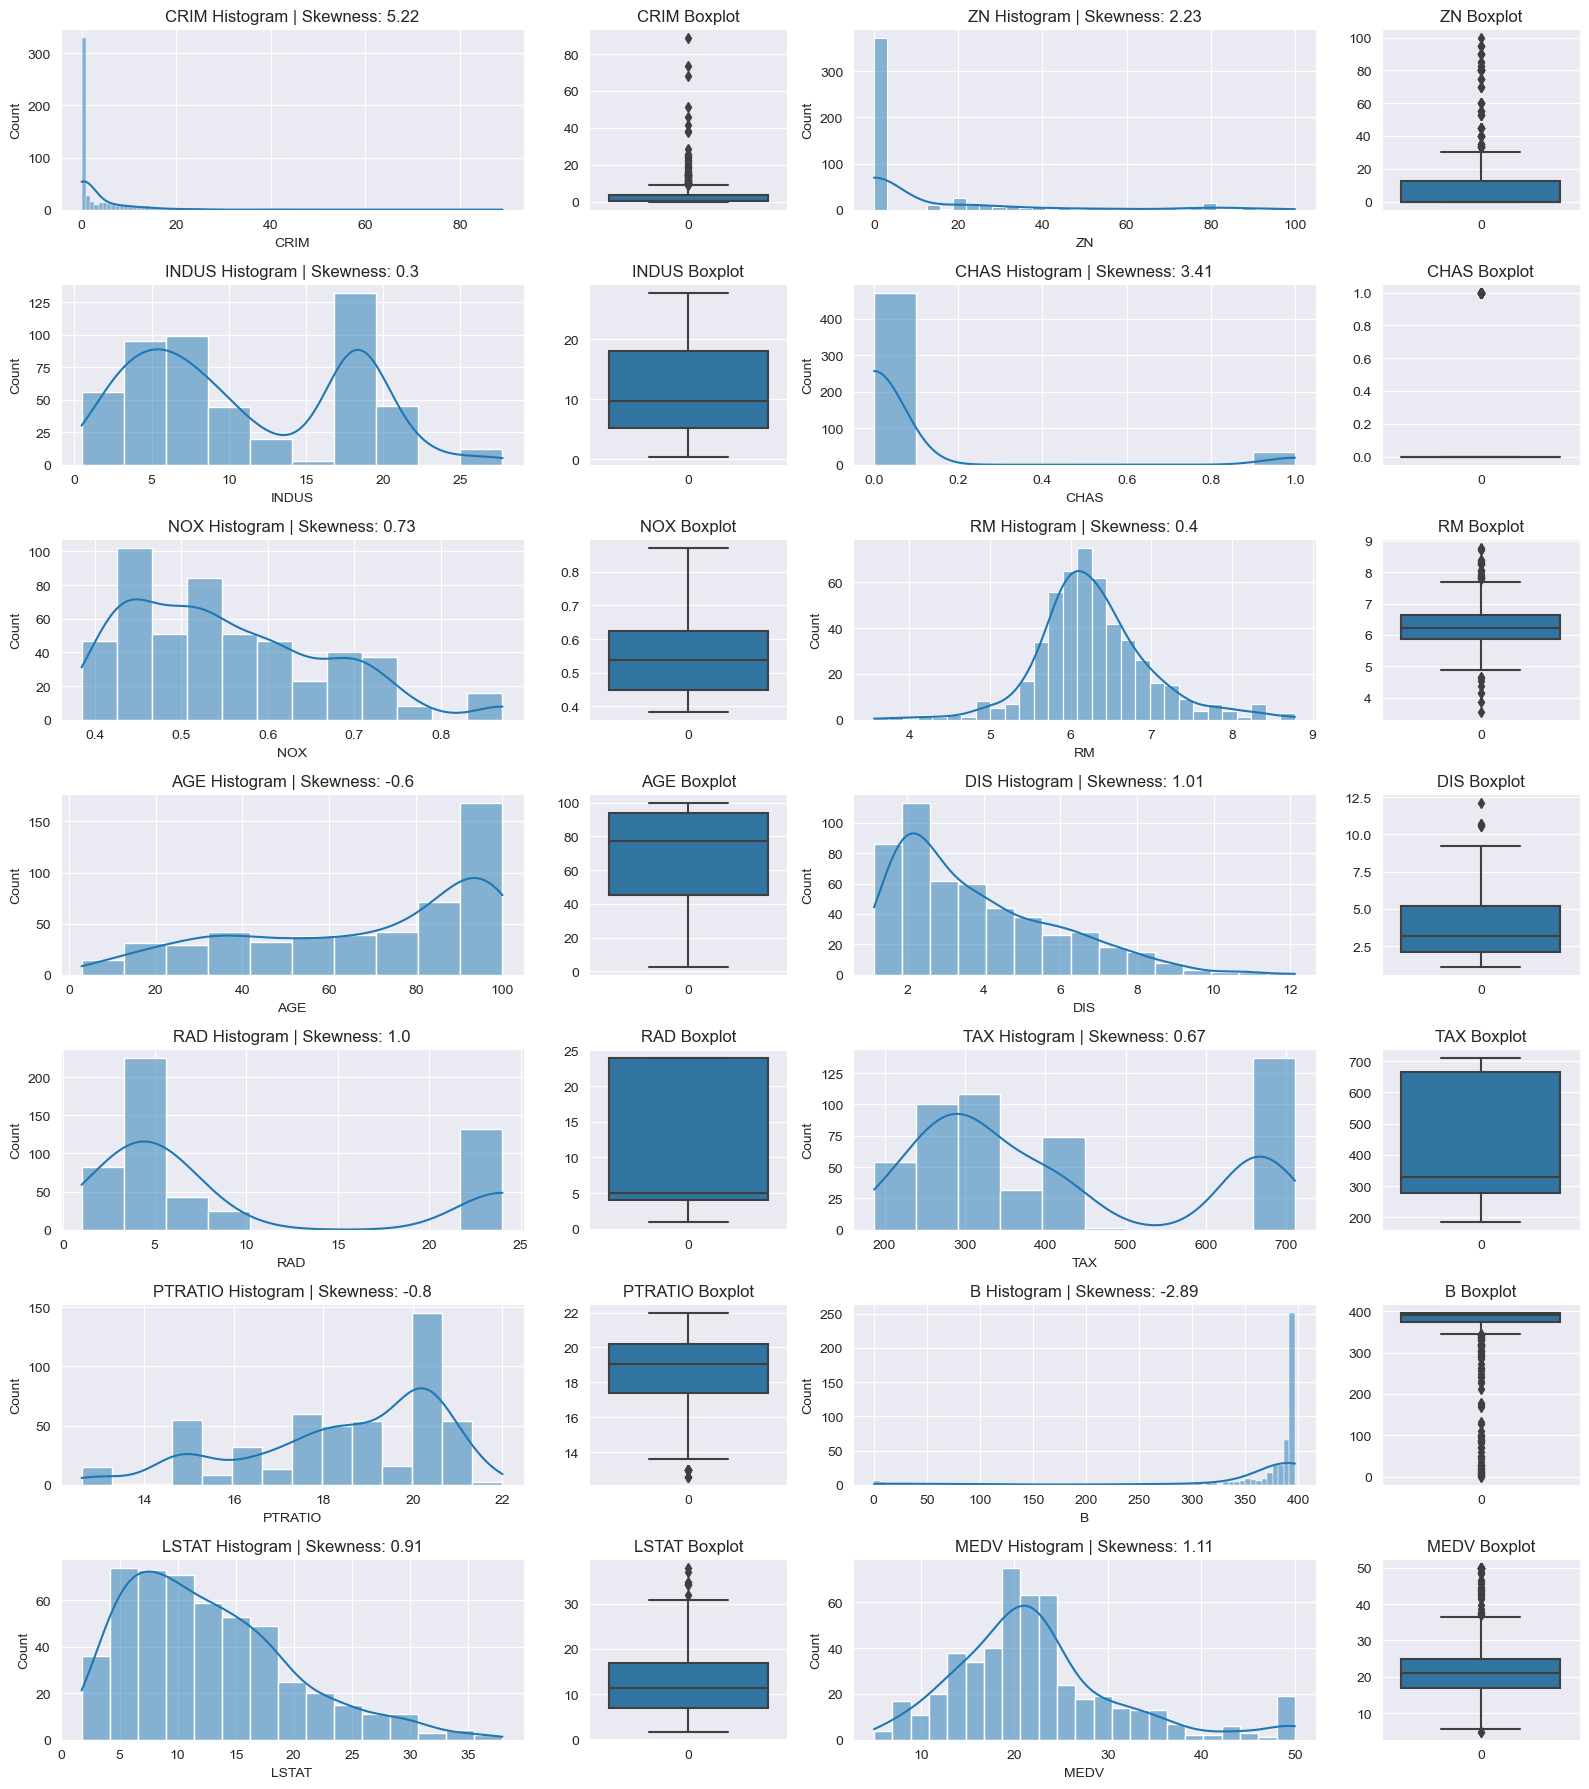

In [8]:
# Set the figure for the plot
fig = plt.figure(figsize=(16, 18))

# Create GridSpec with width ratios for the 4 columns - histograms wider than boxplots
gs = GridSpec(7, 4, width_ratios=[0.7, 0.3, 0.7, 0.3])

# Iterate through each feature and plot histograms and boxplots
for i, feature in enumerate(column_names):
    # Calculate the row and column grid indices
    row = i // 4
    col = i % 4
    
    # Plot histogram in columns 0, 2
    ax_hist = fig.add_subplot(gs[row * 8 + col * 2])
    sns.histplot(df_boston[feature], kde=True, ax=ax_hist)
    ax_hist.set_title(f"{feature} Histogram | Skewness: {round(df_boston[feature].skew(), 2)}")
    
    # Plot boxplot in columns 1, 3
    ax_box = fig.add_subplot(gs[row * 8 + col * 2 + 1])
    sns.boxplot(df_boston[feature], ax=ax_box)
    ax_box.set_title(f"{feature} Boxplot")

# Adjust layout and show plots
plt.tight_layout()
plt.show()



### Bivariate Analysis

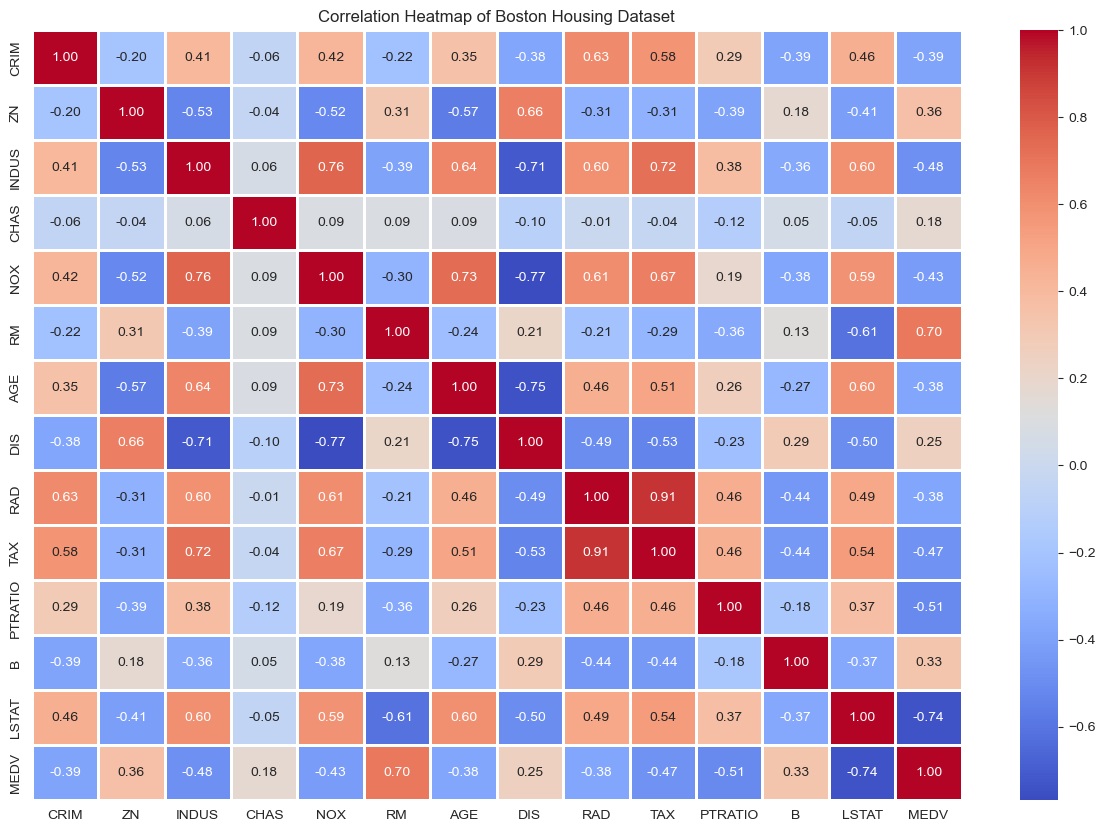

In [9]:
# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df_boston.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=2)
plt.title('Correlation Heatmap of Boston Housing Dataset')
plt.show()

# Linear regression assumptions for Boston House Dataset

### 1. Linear Relationship
The linear regression model assumes that there is a linear relationship between the dependent and independent variables.

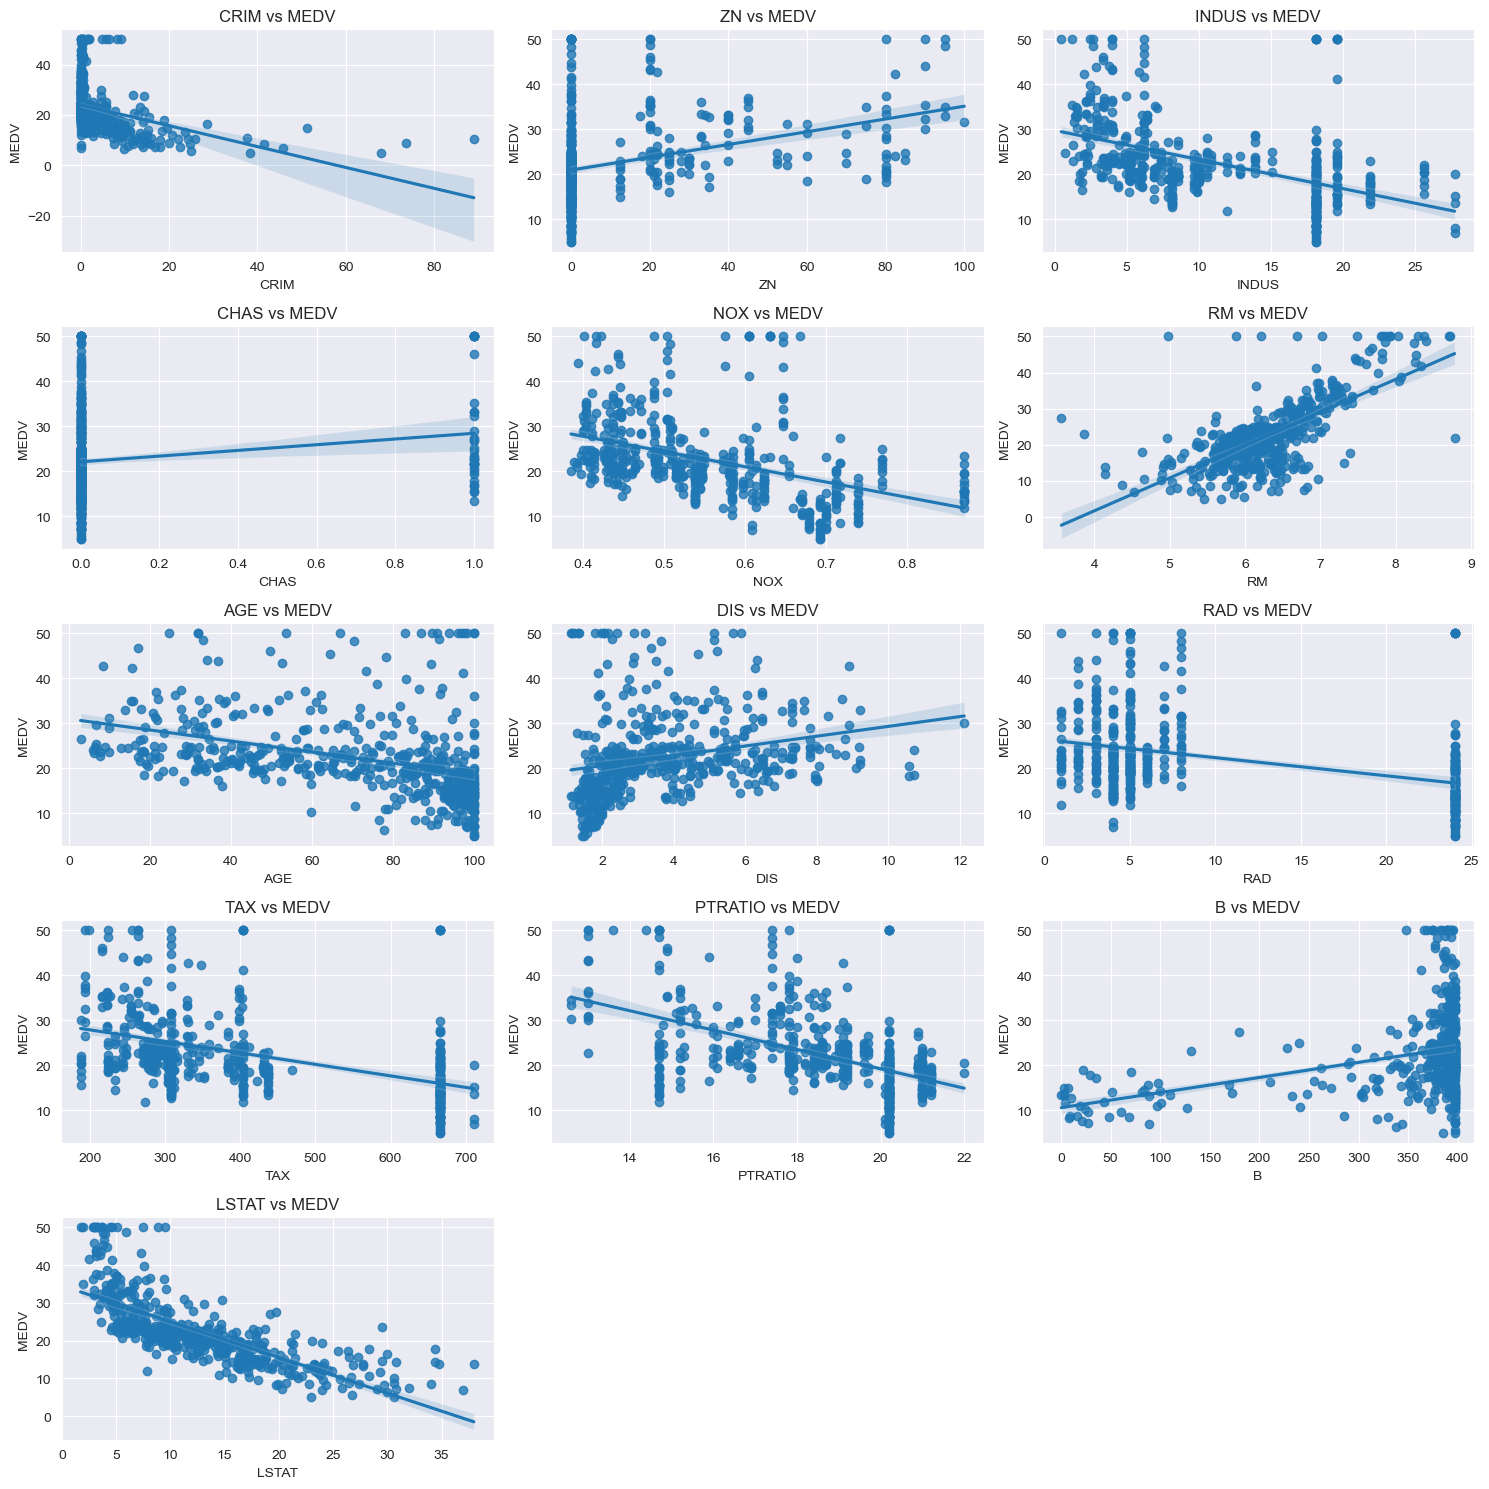

In [10]:
# Set up the figure and subplots
fig, axes = plt.subplots(5, 3, figsize=(15, 15))

# Plot each feature against the dependent variable using regression plots
for i, ax in enumerate(axes.flatten()):
    if i < len(X.columns):
        sns.regplot(x=X.iloc[:, i], y=y.values.flatten(), ax=ax)
        ax.set_title(f'{X.columns[i]} vs MEDV')
        ax.set_xlabel(X.columns[i])
        ax.set_ylabel('MEDV')
    else:
        fig.delaxes(ax)  # Remove empty subplots

# Adjust layout
plt.tight_layout()
plt.show()


In [11]:
# Add a constant term to the independent variables for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
lm = sm.OLS(y, X).fit()

# Get R-squared
r_squared = lm.rsquared
print("R-squared:", r_squared)

# Get Mean Squared Error
mse = lm.mse_resid
print("Mean Squared Error:", mse)

R-squared: 0.7406426641094094
Mean Squared Error: 22.517854833241827


In [12]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 23 Apr 2024   Prob (F-statistic):          6.72e-135
Time:                        21:50:01   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2. Independence of Residuals (No autocorrelation of Error Terms)
No correlated residuals means that each error term is independent and unrelated to other error terms. When residuals are correlated, this typically signals that we are missing some information (e.g. one variable is missing)

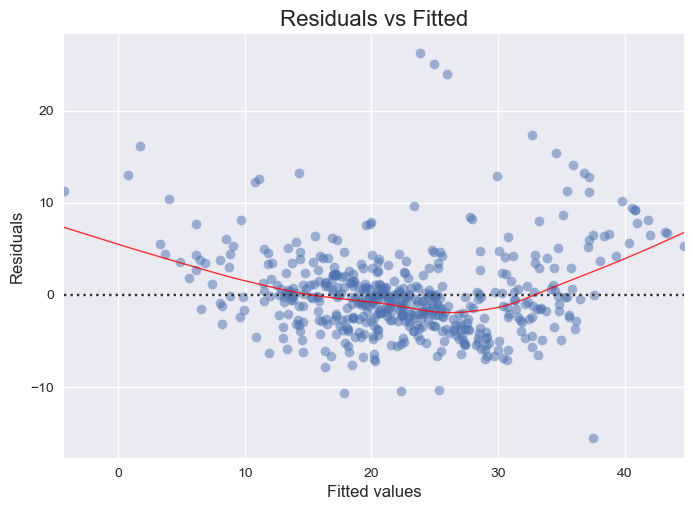

In [13]:
# Predicted values for independent variable
y_pred = lm.fittedvalues

# Plot format
plt.style.use('seaborn')
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=12)
plt.rc('axes', titlesize=16)

plot_lm_1 = plt.figure()
sns.residplot(x=y_pred, y=y,
              lowess=True,
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

In [14]:
durbin_watson_statistic = durbin_watson(resids=np.array(lm.resid))
print("Durbin-Watson Statistic:", durbin_watson_statistic)

Durbin-Watson Statistic: 1.0783751186797255


### 3. Homoscedasticity of residuals (constant variance of error terms)
Homoscedasticity of residuals implies that the variance of the residuals remains constant across all observations. Deviations from this assumption may impact the reliability of standard error estimates.

In [15]:
# Perform the Breusch-Pagan test
residuals = lm.resid

_, p_value, _, _ = het_breuschpagan(residuals, X)
print("Breusch-Pagan test p-value:", p_value)


Breusch-Pagan test p-value: 6.265430719875454e-09


### 4. Normality of residuals (normality of error terms)
Linear regression assumes that residuals are normally distributed. When this assumption is not fulfilled, the model's standard errors become unreliable

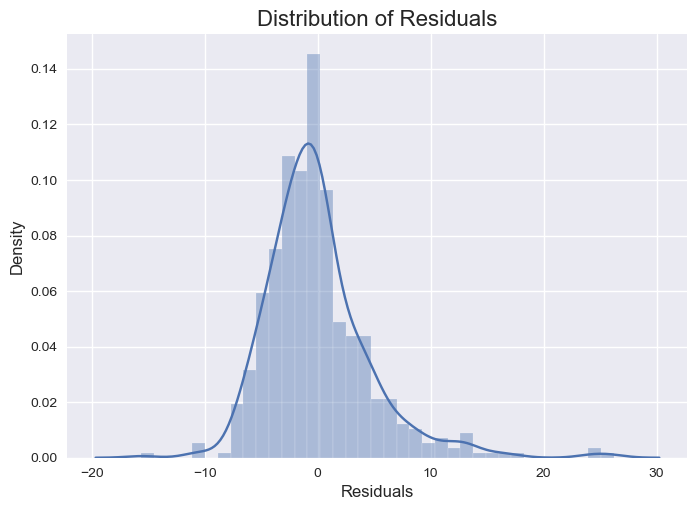

In [16]:
# Plot the distribution of residuals
sns.distplot(residuals)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution of Residuals')
plt.show()

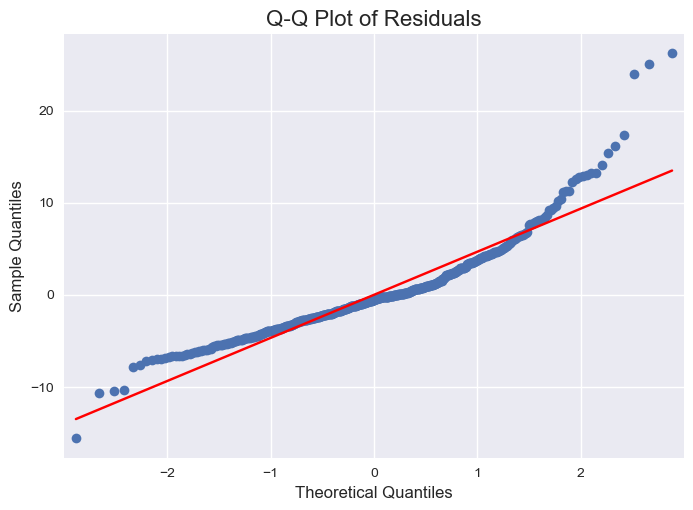

In [17]:
# Q-Q Plot - 's' line: standardized line, expected under normality
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [18]:
# Perform the Shapiro-Wilk test
shapiro_test = stats.shapiro(residuals)

# Print the test statistic and p-value
print("Shapiro-Wilk test statistic:", shapiro_test.statistic)
print("Shapiro-Wilk p-value:", shapiro_test.pvalue)

Shapiro-Wilk test statistic: 0.9013806581497192
Shapiro-Wilk p-value: 1.480177833053824e-17


### 5. No multicollinearity among predictors
Linear regression assumes that residuals are normally distributed. When this assumption is not fulfilled, the model's standard errors become unreliable

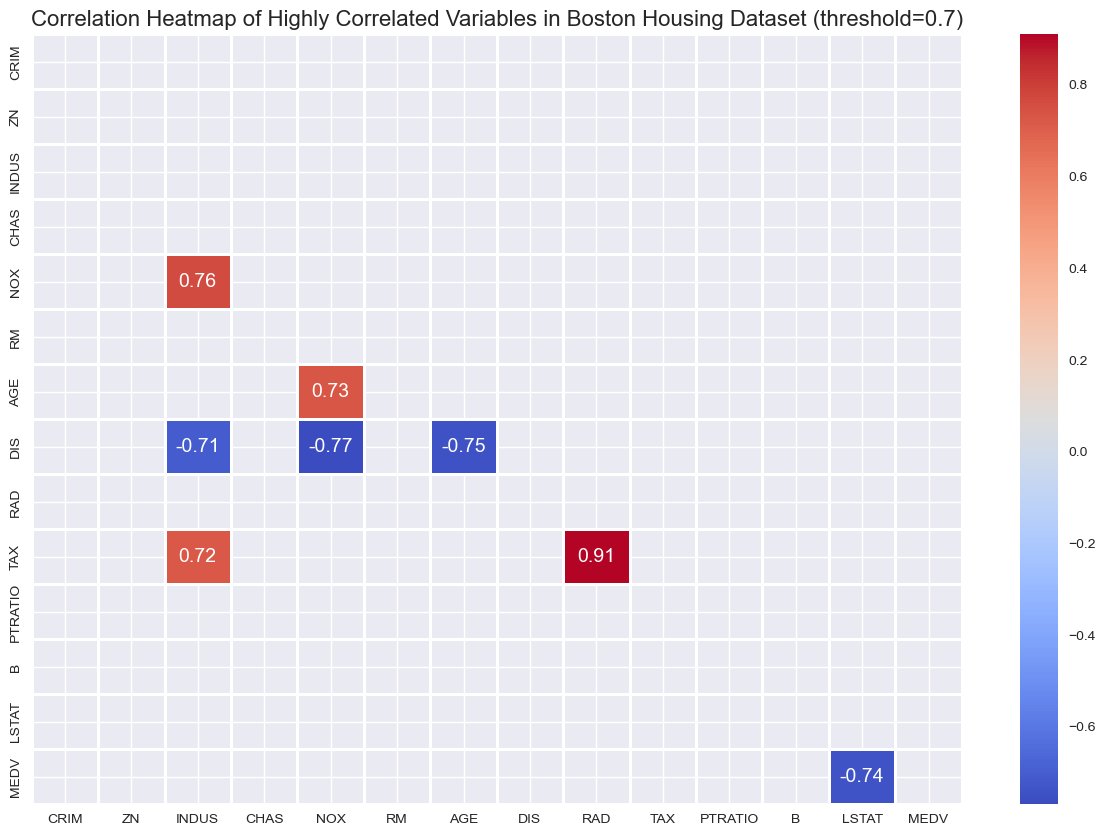

In [19]:
# Set the correlation threshold
threshold = 0.7  # Adjust as needed

# Create a mask to hide the upper triangle (to avoid duplicate correlations)
mask = np.triu(np.ones_like(df_boston.corr(), dtype=bool))

# Filter correlations that exceed the threshold
highly_correlated = df_boston.corr().abs() > threshold

# Plot the filtered heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df_boston.corr()[highly_correlated], annot=True, fmt='.2f', cmap='coolwarm', linewidths=2, mask=mask)
plt.title('Correlation Heatmap of Highly Correlated Variables in Boston Housing Dataset (threshold={})'.format(threshold))
plt.show()


In [20]:
# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


   Variable         VIF
0     const  585.265238
1      CRIM    1.792192
2        ZN    2.298758
3     INDUS    3.991596
4      CHAS    1.073995
5       NOX    4.393720
6        RM    1.933744
7       AGE    3.100826
8       DIS    3.955945
9       RAD    7.484496
10      TAX    9.008554
11  PTRATIO    1.799084
12        B    1.348521
13    LSTAT    2.941491


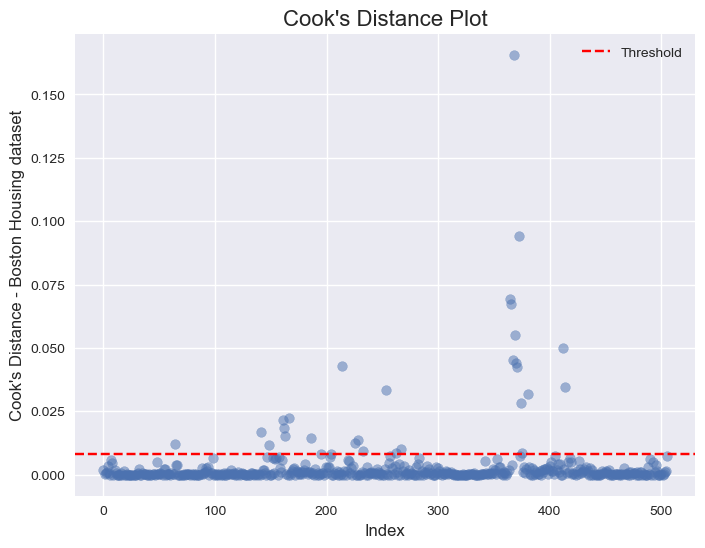

In [21]:
# Calculate Cook's distance
influence = lm.get_influence()
cooks_distance = influence.cooks_distance[0]

# Get the number of observations (n) and the number of independent variables (k)
n = X.shape[0]
k = X.shape[1] - 1

# Calculate the threshold using the formula 4 / (n - k - 1)
cook_threshold = 4 / (n - k - 1)

# Plot Cook's distance
plt.figure(figsize=(8, 6))
plt.scatter(range(len(cooks_distance)), cooks_distance, alpha=0.5)
plt.xlabel('Index')
plt.ylabel("Cook's Distance - Boston Housing dataset")
plt.title("Cook's Distance Plot")
plt.axhline(cook_threshold, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.show()

# Import Data - Diabetes Dataset

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

Number of Instances: 442

Number of Attributes: First 10 columns are numeric predictive values

Target: Column 11 is a quantitative measure of disease progression one year after baseline

Attribute Information:
- age: age in years
- sex
- bmi: body mass index
- bp: average blood pressure
- s1: tc, total serum cholesterol
- s2: ldl, low-density lipoproteins
- s3: hdl, high-density lipoproteins
- s4: tch, total cholesterol / HDL
- s5: ltg, possibly log of serum triglycerides level
- s6: glu, blood sugar level
- y: numerical measurement of disease progression

# Exploratory Data Analysis for Diabetes Dataset

### Description of Data

In [22]:
from sklearn.datasets import load_diabetes

# Load the diabetes dataset and format it into a df
diabetes = load_diabetes()
df_diabetes = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df_diabetes['y'] = pd.Series(diabetes.target)

# Extract independent variables (X) and target variable (y)
X = df_diabetes[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']]
y = df_diabetes[['y']]

# inspect data
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [23]:
df_diabetes.shape

(442, 11)

In [24]:
df_diabetes.dtypes

age    float64
sex    float64
bmi    float64
bp     float64
s1     float64
s2     float64
s3     float64
s4     float64
s5     float64
s6     float64
y      float64
dtype: object

In [25]:
df_diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


In [26]:
df_diabetes.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
y      0
dtype: int64

In [27]:
df_diabetes[df_diabetes.duplicated()]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y


### Univariate Analysis

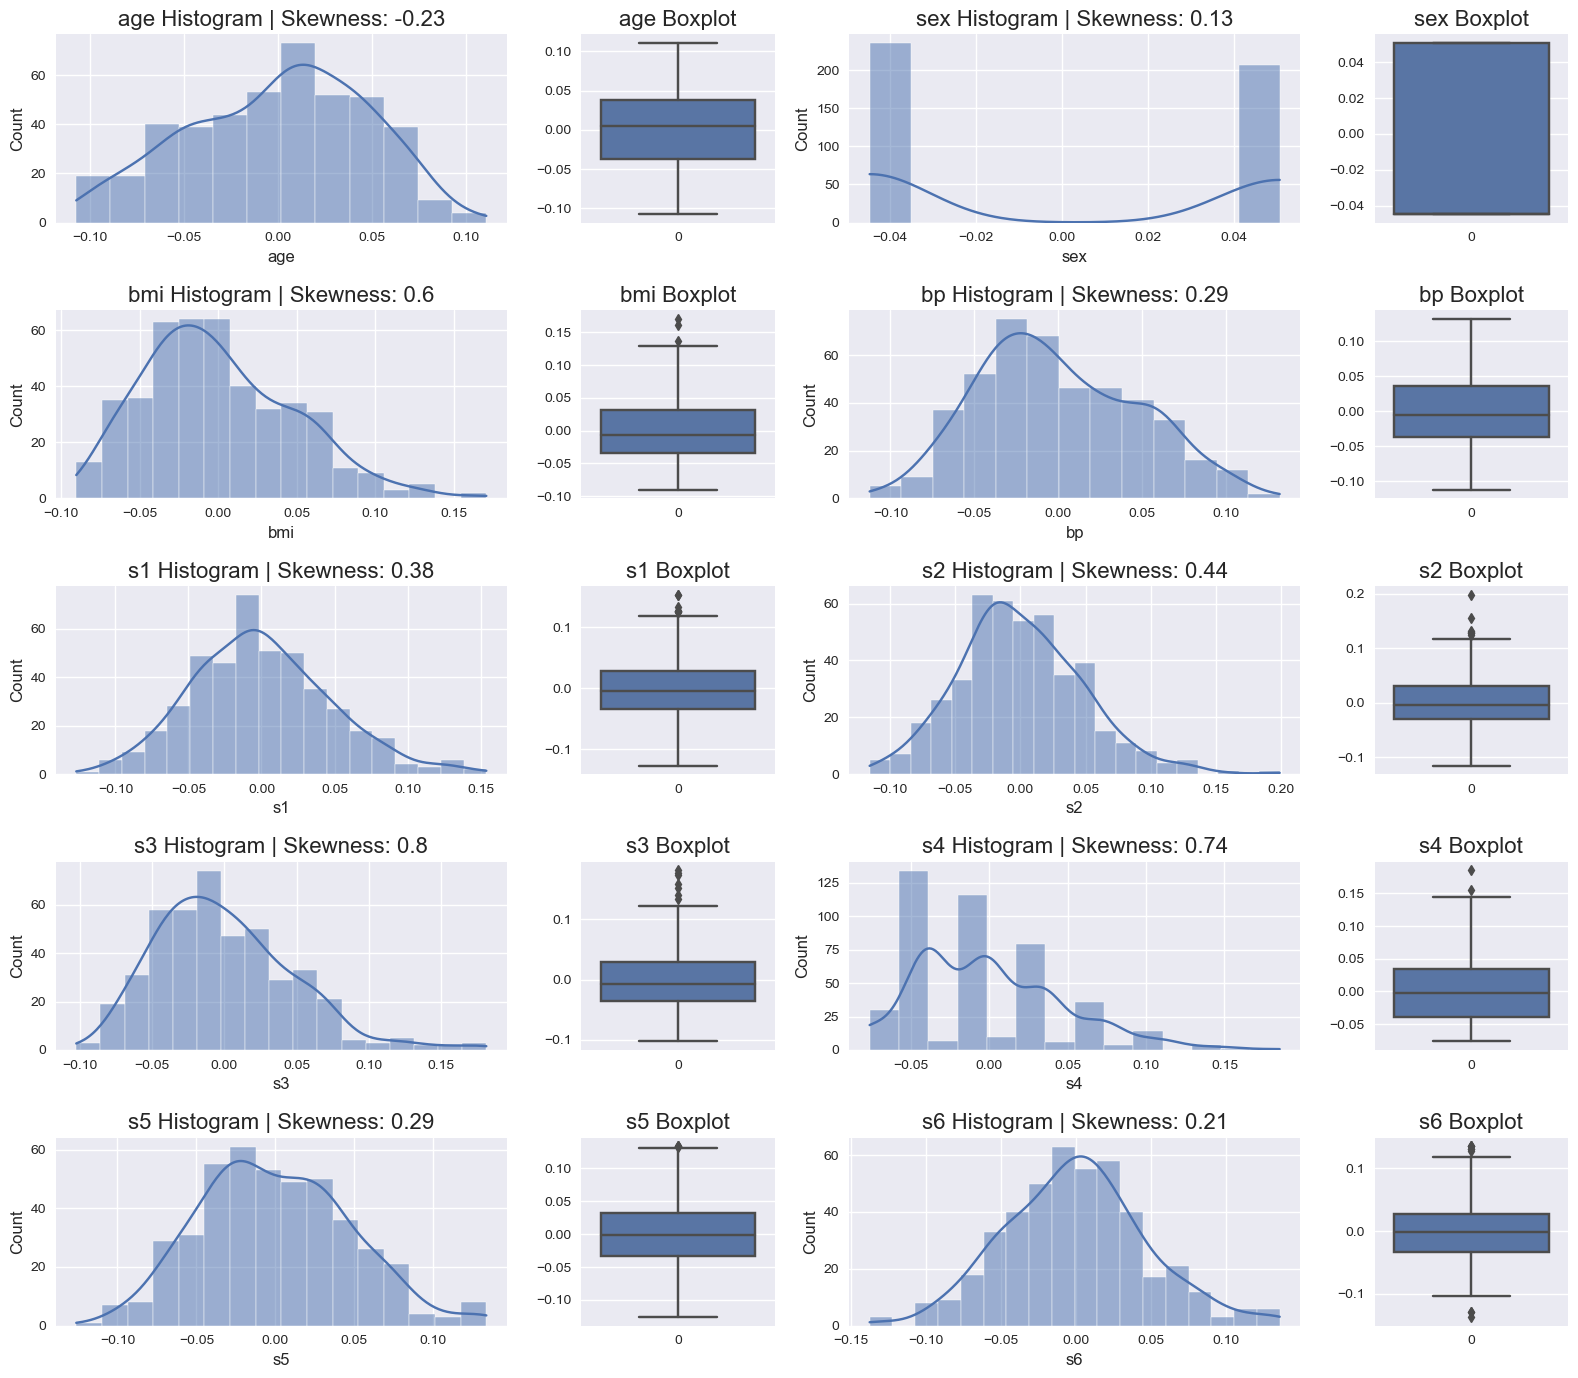

In [28]:
# Set the figure for the plot
fig = plt.figure(figsize=(16, 14))

# Create GridSpec with width ratios for the 4 columns - histograms wider than boxplots
gs = GridSpec(5, 4, width_ratios=[0.7, 0.3, 0.7, 0.3])

# Iterate through each feature and plot histograms and boxplots
for i, feature in enumerate(X.columns):
    # Calculate the row and column grid indices
    row = i // 4
    col = i % 4
    
    # Plot histogram in columns 0, 2
    ax_hist = fig.add_subplot(gs[row * 8 + col * 2])
    sns.histplot(df_diabetes[feature], kde=True, ax=ax_hist)
    ax_hist.set_title(f"{feature} Histogram | Skewness: {round(df_diabetes[feature].skew(), 2)}")
    
    # Plot boxplot in columns 1, 3
    ax_box = fig.add_subplot(gs[row * 8 + col * 2 + 1])
    sns.boxplot(df_diabetes[feature], ax=ax_box)
    ax_box.set_title(f"{feature} Boxplot")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

### Bivariate Analysis

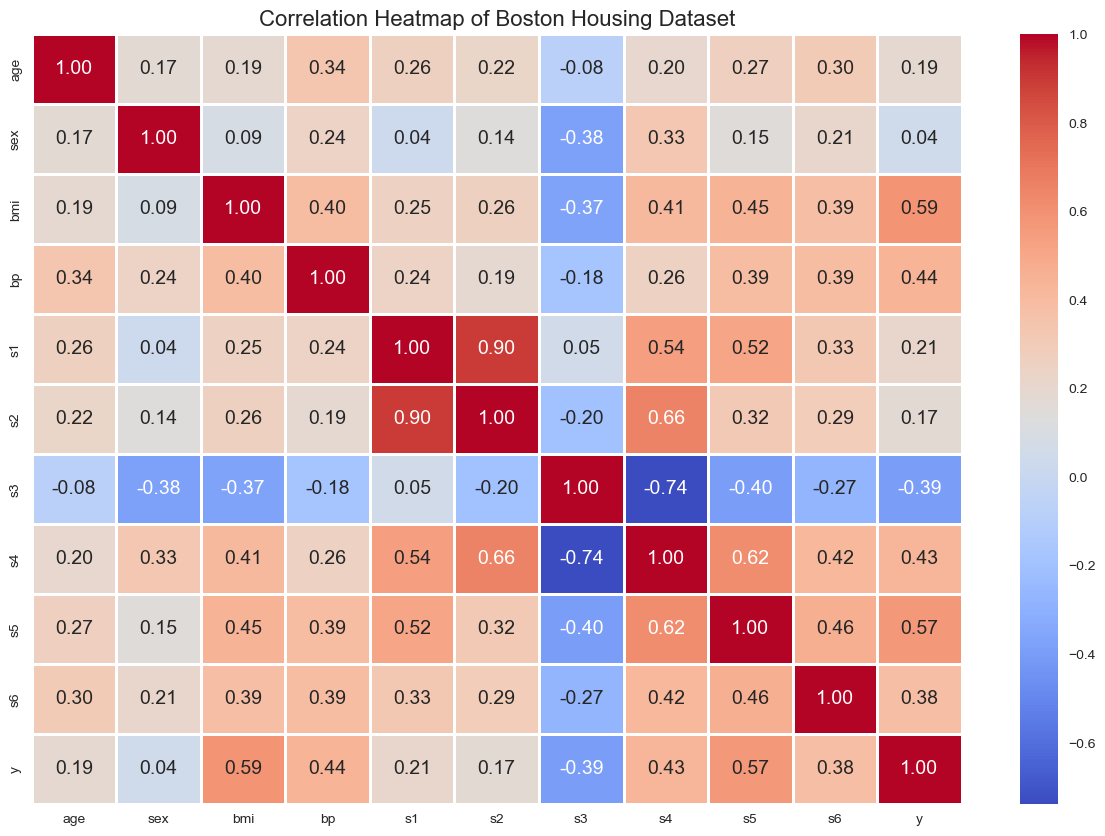

In [29]:
# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df_diabetes.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=2)
plt.title('Correlation Heatmap of Boston Housing Dataset')
plt.show()

# Linear regression assumptions for Diabetes dataset

### 1. Linear Relationship
The linear regression model assumes that there is a linear relationship between the dependent and independent variables.

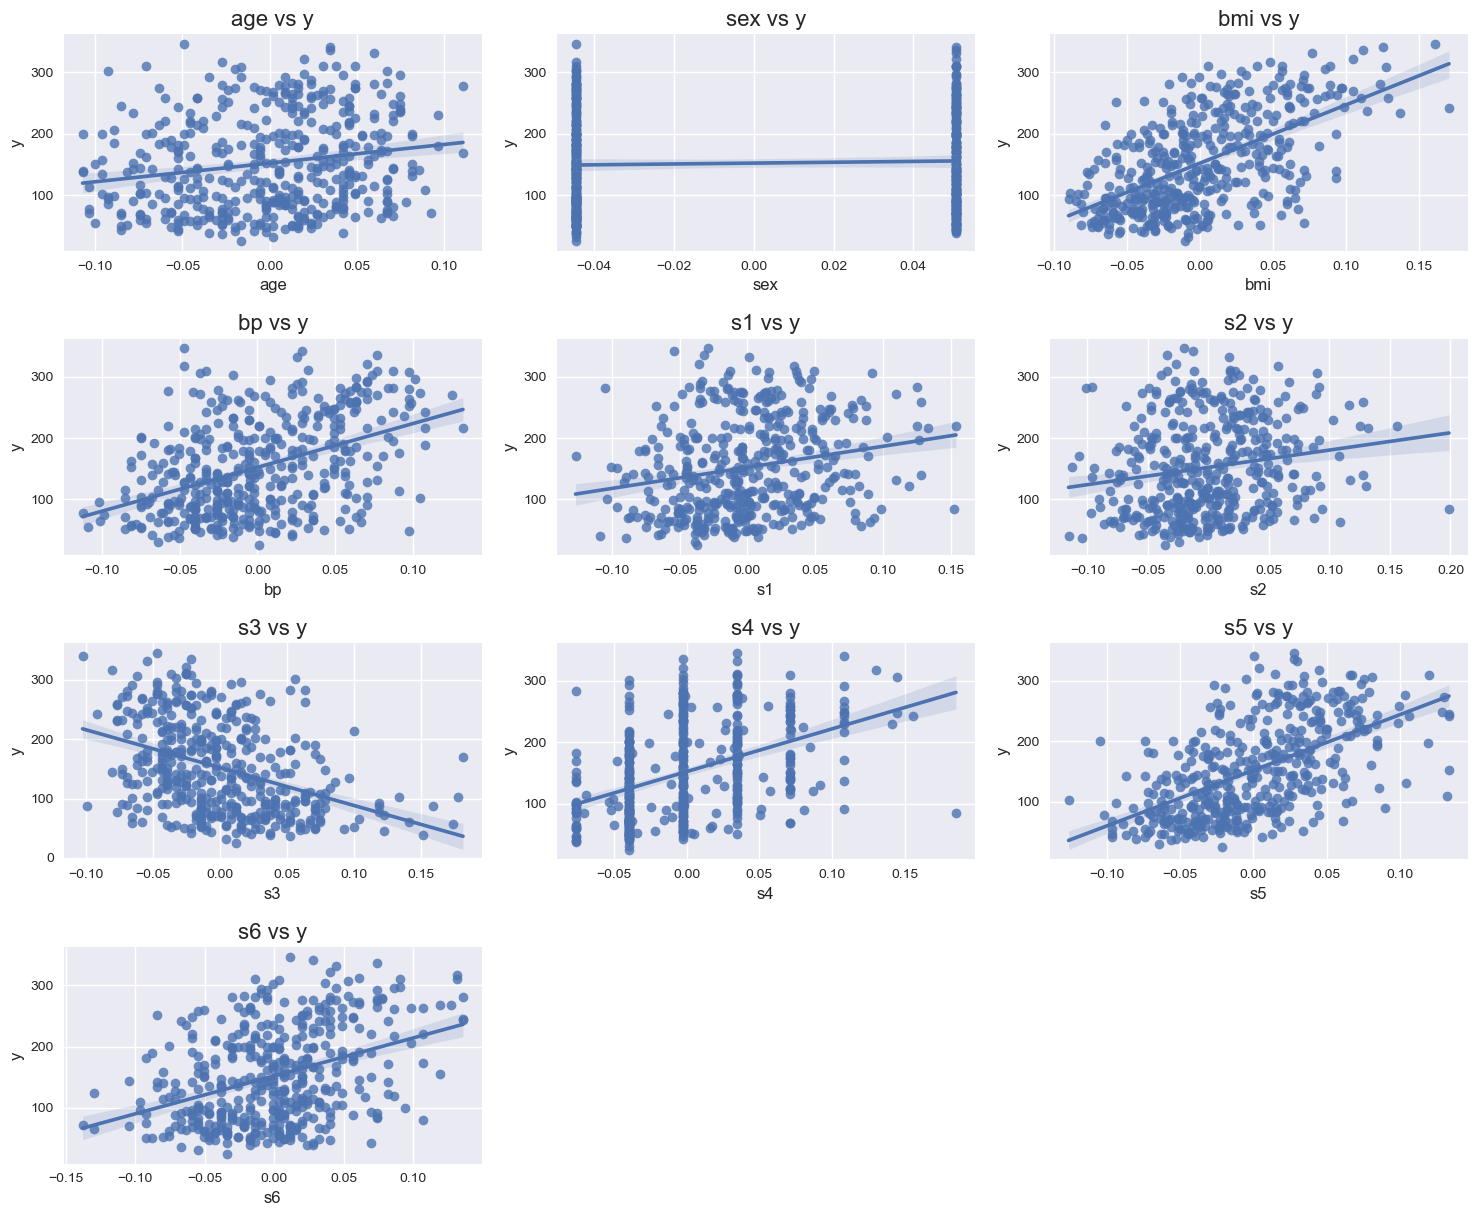

In [30]:
# Set up the figure and subplots
fig, axes = plt.subplots(5, 3, figsize=(15, 15))

# Plot each feature against the dependent variable using regression plots
for i, ax in enumerate(axes.flatten()):
    if i < len(X.columns):
        sns.regplot(x=X.iloc[:, i], y=y.values.flatten(), ax=ax)
        ax.set_title(f'{X.columns[i]} vs y')
        ax.set_xlabel(X.columns[i])
        ax.set_ylabel('y')
    else:
        fig.delaxes(ax)  # Remove empty subplots

# Adjust layout
plt.tight_layout()
plt.show()

In [31]:
# Add a constant term to the independent variables for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
lm = sm.OLS(y, X).fit()

# Get R-squared
r_squared = lm.rsquared
print("R-squared:", r_squared)

# Get Mean Squared Error
mse = lm.mse_resid
print("Mean Squared Error:", mse)

R-squared: 0.5177484222203498
Mean Squared Error: 2932.6816372003336


In [32]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           3.83e-62
Time:                        21:50:09   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.000     147.071     157.196
age          -10.0099     59.749     -0.168      0.867    -127.446     107.426
sex         -239.8156     61.222     -3.917      0.000    -360.147    -119.484
bmi          519.8459     66.533      7.813      0.000     389.076     650.616
bp           324.3846     65.422      4.958      0.000     195.799     452.970
s1          -792.1756    416.680     -1.901      0.058   -1611.153      26.802
s2           476.7390    339.030      1.406      0.160    -189.620    1143.098
s3           101.0433    212.531      0.475      0.635    -316.684     518.770
s4           177.0632    161.476      1.097      0.273    -140.315     494.441
s5           751.2737    171.900      4.370      0.000     413.407    1089.140
s6            67.6267     65.984      1.025      0.306     -62.064     197.318
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. Independence of Residuals (No autocorrelation of Error Terms)
No correlated residuals means that each error term is independent and unrelated to other error terms. When residuals are correlated, this typically signals that we are missing some information (e.g. one variable is missing)

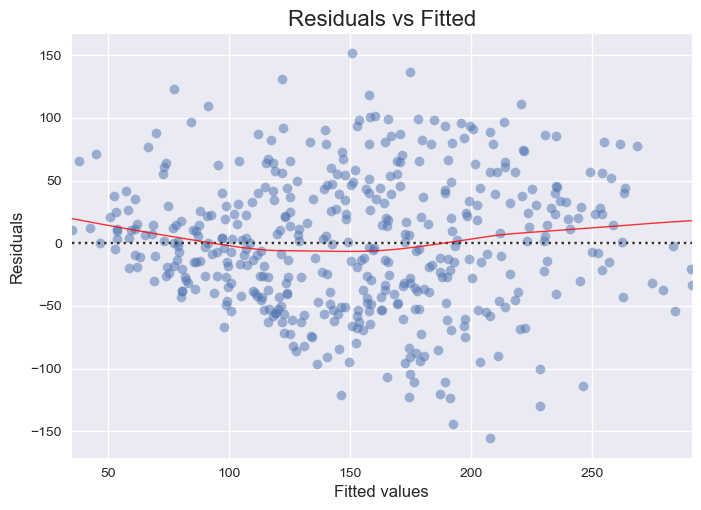

In [33]:
# Predicted values for independent variable
y_pred = lm.fittedvalues

# Plot format
plt.style.use('seaborn')
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=12)
plt.rc('axes', titlesize=16)

plot_lm_1 = plt.figure()
sns.residplot(x=y_pred, y=y,
              lowess=True,
              scatter_kws={'alpha': 0.5},
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

In [34]:
durbin_watson_statistic = durbin_watson(resids=np.array(lm.resid))
print("Durbin-Watson Statistic:", durbin_watson_statistic)

Durbin-Watson Statistic: 2.0285432192544266


### 3. Homoscedasticity of residuals (constant variance of error terms)
Homoscedasticity of residuals implies that the variance of the residuals remains constant across all observations. Deviations from this assumption may impact the reliability of standard error estimates.

In [35]:
# Perform the Breusch-Pagan test
residuals = lm.resid

_, p_value, _, _ = het_breuschpagan(residuals, X)
print("Breusch-Pagan test p-value:", p_value)

Breusch-Pagan test p-value: 0.00354952241928149


### 4. Normality of residuals (normality of error terms)
Linear regression assumes that residuals are normally distributed. When this assumption is not fulfilled, the model's standard errors become unreliable

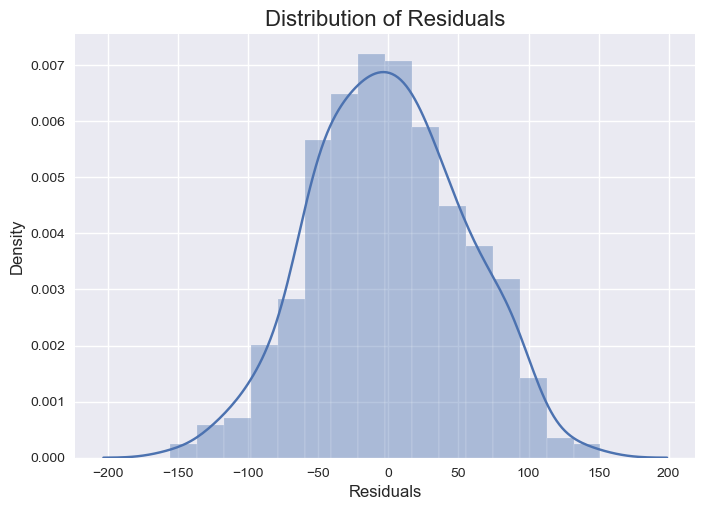

In [36]:
# Plot the distribution of residuals
sns.distplot(residuals)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Distribution of Residuals')
plt.show()

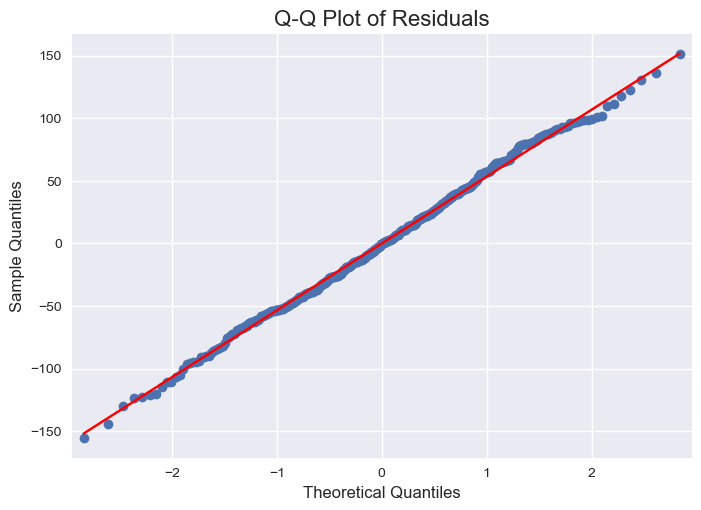

In [37]:
# Q-Q Plot - 's' line: standardized line, expected under normality
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [38]:
# Perform the Shapiro-Wilk test
shapiro_test = stats.shapiro(residuals)

# Print the test statistic and p-value
print("Shapiro-Wilk test statistic:", shapiro_test.statistic)
print("Shapiro-Wilk p-value:", shapiro_test.pvalue)

Shapiro-Wilk test statistic: 0.9970647692680359
Shapiro-Wilk p-value: 0.6161732077598572


### 5. No multicollinearity among predictors
Linear regression assumes that residuals are normally distributed. When this assumption is not fulfilled, the model's standard errors become unreliable

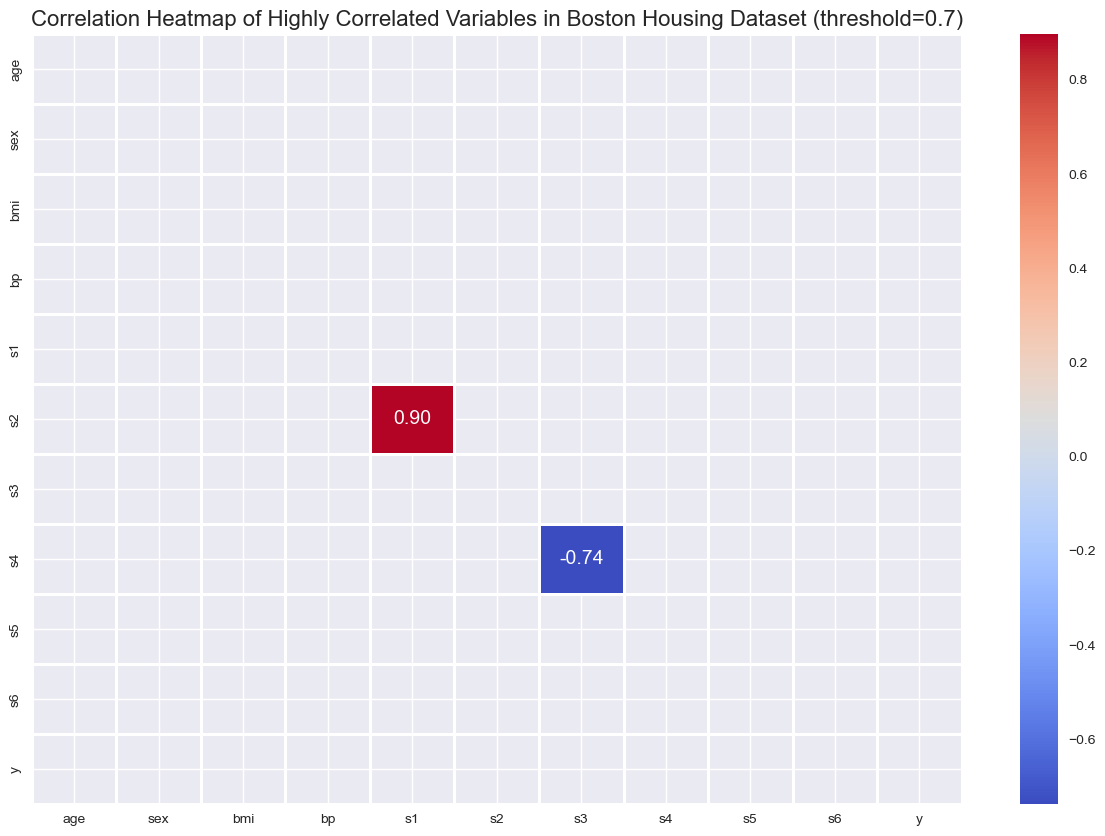

In [39]:
# Set the correlation threshold
threshold = 0.7  # Adjust as needed

# Create a mask to hide the upper triangle (to avoid duplicate correlations)
mask = np.triu(np.ones_like(df_diabetes.corr(), dtype=bool))

# Filter correlations that exceed the threshold
highly_correlated = df_diabetes.corr().abs() > threshold

# Plot the filtered heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df_diabetes.corr()[highly_correlated], annot=True, fmt='.2f', cmap='coolwarm', linewidths=2, mask=mask)
plt.title('Correlation Heatmap of Highly Correlated Variables in Boston Housing Dataset (threshold={})'.format(threshold))
plt.show()

In [40]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

   Variable        VIF
0     const   1.000000
1       age   1.217307
2       sex   1.278071
3       bmi   1.509437
4        bp   1.459428
5        s1  59.202510
6        s2  39.193370
7        s3  15.402156
8        s4   8.890986
9        s5  10.075967
10       s6   1.484623


# Look for Outliers
An outlier is an atypical observation that significantly deviates from an expected pattern for some given predictors. Contrary to the outlier, a high leverage point is an atypical observation in predictor x. These points might have a high influence on the model; therefore, these observations should be considered for exclusion.

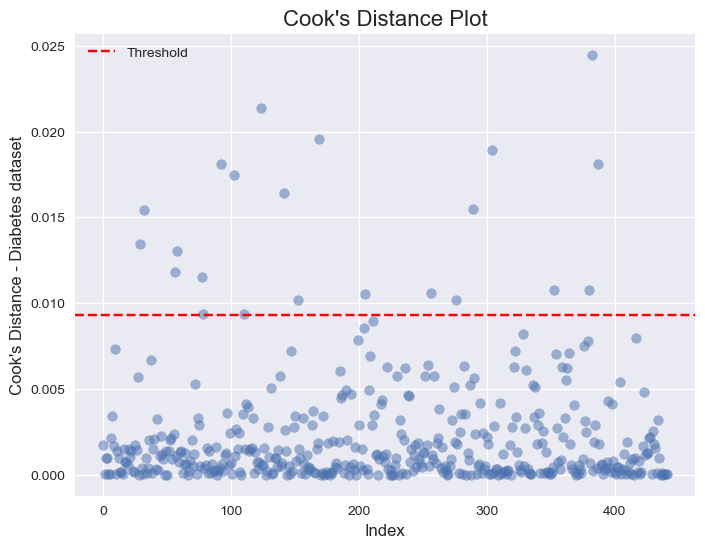

In [41]:
# Calculate Cook's distance
influence = lm.get_influence()
cooks_distance = influence.cooks_distance[0]

# Get the number of observations (n) and the number of independent variables (k)
n = X.shape[0]
k = X.shape[1] - 1

# Calculate the threshold using the formula 4 / (n - k - 1)
cook_threshold = 4 / (n - k - 1)

# Plot Cook's distance
plt.figure(figsize=(8, 6))
plt.scatter(range(len(cooks_distance)), cooks_distance, alpha=0.5)
plt.xlabel('Index')
plt.ylabel("Cook's Distance - Diabetes dataset")
plt.title("Cook's Distance Plot")
plt.axhline(cook_threshold, color='r', linestyle='--', label='Threshold')
plt.legend()
plt.show()